In [6]:
#-----------------------------------------------------------------------
# Librerías y algunas variables
#-----------------------------------------------------------------------
import mne                                                              # pip install mne
mne.set_log_level('WARNING')                                            # Luego averiguar ¿para qué?
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    # Por ahora lo voy a usar para cambiar los nombres de las columnas

import a_funciones as a_fun  
import random

color = ['green', 'blue','red','cyan', 'magenta', 'yellow','brown','k']     # Paleta de colores para diferenciar las ondas
xlabel = 'Muestra'
ylabel = 'Amplitud (uV)'

#-----------------------------------------------------------------------
# Funciones DrugSignal
#-----------------------------------------------------------------------
def DrugSignal(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            elemento_random_array_DrugAmpERPtemplate = random.choice(array_DrugAmpERPtemplate) # Random.choice que llame a los 5 distintos tipos de templates ERP. 
            print('----------------------------------------------------')
            print(f'random choice: ', random.choice(array_DrugAmpERPtemplate))
            print('----------------------------------------------------')
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (elemento_random_array_DrugAmpERPtemplate)            
    return signal

#-----------------------------------------------------------------------
# Carga de archivos para proceso de señales
#-----------------------------------------------------------------------
mat = scipy.io.loadmat('./dataset/ERPTemplate.mat')
routput = mat['routput']

erptemplate1 = routput[0][7][0][1][0][0][0][7]                          # In this ERPTemplate, there are two different template signals that are good.
erptemplate2 = routput[0][7][0][1][0][0][0][0] 

erptemplate1 = np.delete(erptemplate1, range(0,256,43),0)              # The original ERPTemplate dataset has a sampling frequency of 256 so I need to perform a small downsampling to 250 Hz
erptemplate2 = np.delete(erptemplate2, range(0,256,43),0)
df_erptemplate1 = a_fun.to_df(erptemplate1)

#-----------------------------------------------------------------------
# array_DrugAmpERPtemplate es un vector de 5 templates ERP con 
# distintas variaciones en amplitud +/- 20% del valor max y min del ERPtemplate original
#-----------------------------------------------------------------------
#print('----------------------------------------------------')
#print(f'Valor mínimo del ERPTemplate: ',erptemplate1.min())
#print(f'Valor máximo del ERPTemplate: ',erptemplate1.max())
#print('----------------------------------------------------')
v_min = erptemplate1.min()*0.2
v_max = erptemplate1.max()*0.2
array_DrugAmpERPtemplate = np.empty(5,dtype=object)
for i in range(5):
    v_aleatorio = np.random.uniform(v_min, v_max, (1, 8)) # B = np.random.rand(1, 8) Array B de dim (1, 8) con valores aleatorios
    #print(f'v_aleatorio({i}): ',v_aleatorio)
    # v_aleatorio = [-5,1,5,0,5,0,5,0] # Vector fijo para testing
    DrugAmpERPtemplate = np.empty_like(erptemplate1) # Inicializo un array igual que erptemplate1
    for j in range(erptemplate1.shape[0]):
        DrugAmpERPtemplate[j, :] = erptemplate1[j, :] + v_aleatorio
    array_DrugAmpERPtemplate[i] = DrugAmpERPtemplate
    #print(f'array_DrugAmpERPtemplate[{i}].min()', array_DrugAmpERPtemplate[i].min())
    #print(f'array_DrugAmpERPtemplate[{i}].max()', array_DrugAmpERPtemplate[i].max())
    #print('----------------------------------------------------')

# Carga de la señal EEG
punto_mat = scipy.io.loadmat('./dataset/itba/P300S01.mat') 
signal = punto_mat['data'][0][0][0] 

t_trials = punto_mat['data'][0][0][3]
t_flash = punto_mat['data'][0][0][4] 

signal = DrugSignal(signal, t_flash)

t_stim = punto_mat['data'][0][0][2]
t_type = punto_mat['data'][0][0][1]

ch_names=['Fz','Cz','P3','Pz','P4','PO7','PO8', 'Oz'] # Nombres de los canales

----------------------------------------------------
random choice:  [[-0.4594046   0.41336729  0.47184534 ... -0.4130136   2.24607545
   1.18440752]
 [-0.40758757  0.43648998  0.43045342 ... -0.43235892  2.23737604
   1.15156078]
 [-0.35191878  0.46367495  0.38807386 ... -0.45223419  2.22022536
   1.11418755]
 ...
 [-0.82838362 -0.72036739 -1.412098   ... -1.58580355 -0.32614527
  -0.02470553]
 [-0.8290136  -0.73593706 -1.45722687 ... -1.63149178 -0.40143809
  -0.0711737 ]
 [-0.8260062  -0.75082715 -1.50403947 ... -1.68333804 -0.47919706
  -0.12059158]]
----------------------------------------------------
----------------------------------------------------
random choice:  [[-0.89900616 -0.34540033 -0.13584512 ...  1.01951073  1.82415249
  -0.52396053]
 [-0.84718913 -0.32227764 -0.17723704 ...  1.0001654   1.81545308
  -0.55680727]
 [-0.79152035 -0.29509268 -0.21961661 ...  0.98029014  1.7983024
  -0.59418049]
 ...
 [-1.26798519 -1.47913501 -2.01978846 ... -0.15327922 -0.74806823
  -1

In [70]:
df_DrugAmpERPtemplate = a_fun.to_df(array_DrugAmpERPtemplate[4])
#df_DrugAmpERPtemplate.describe()

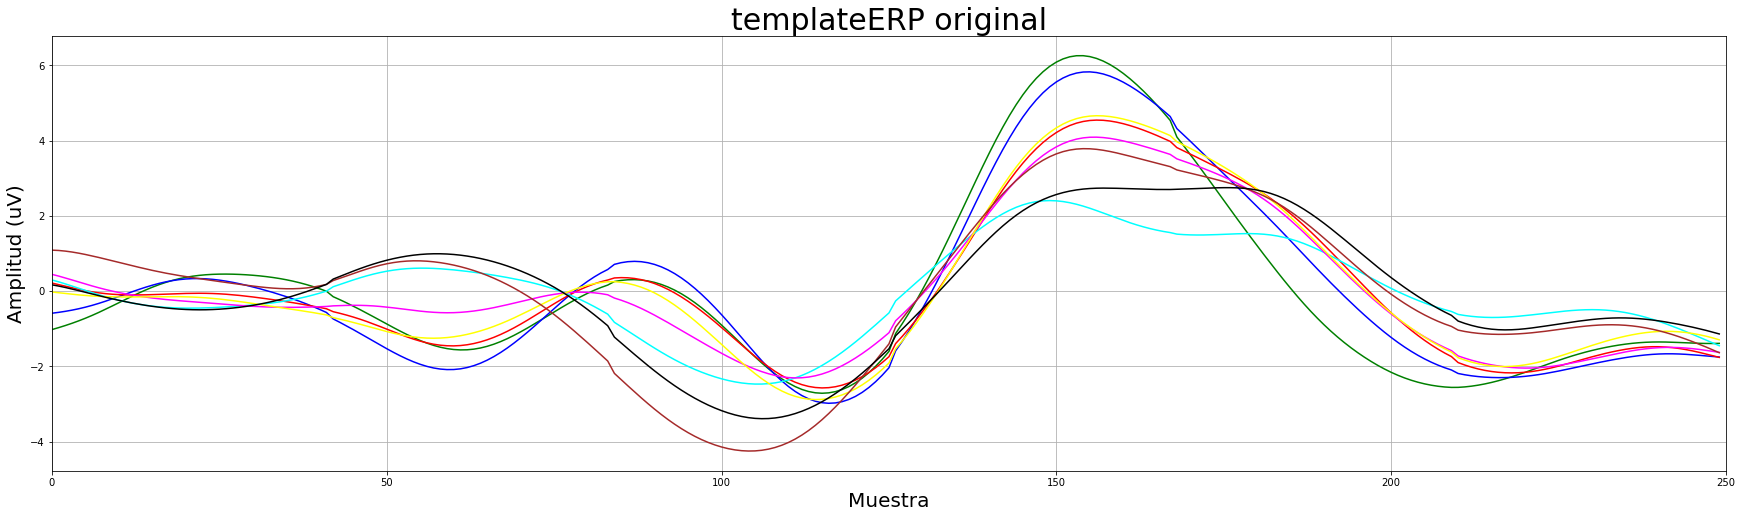

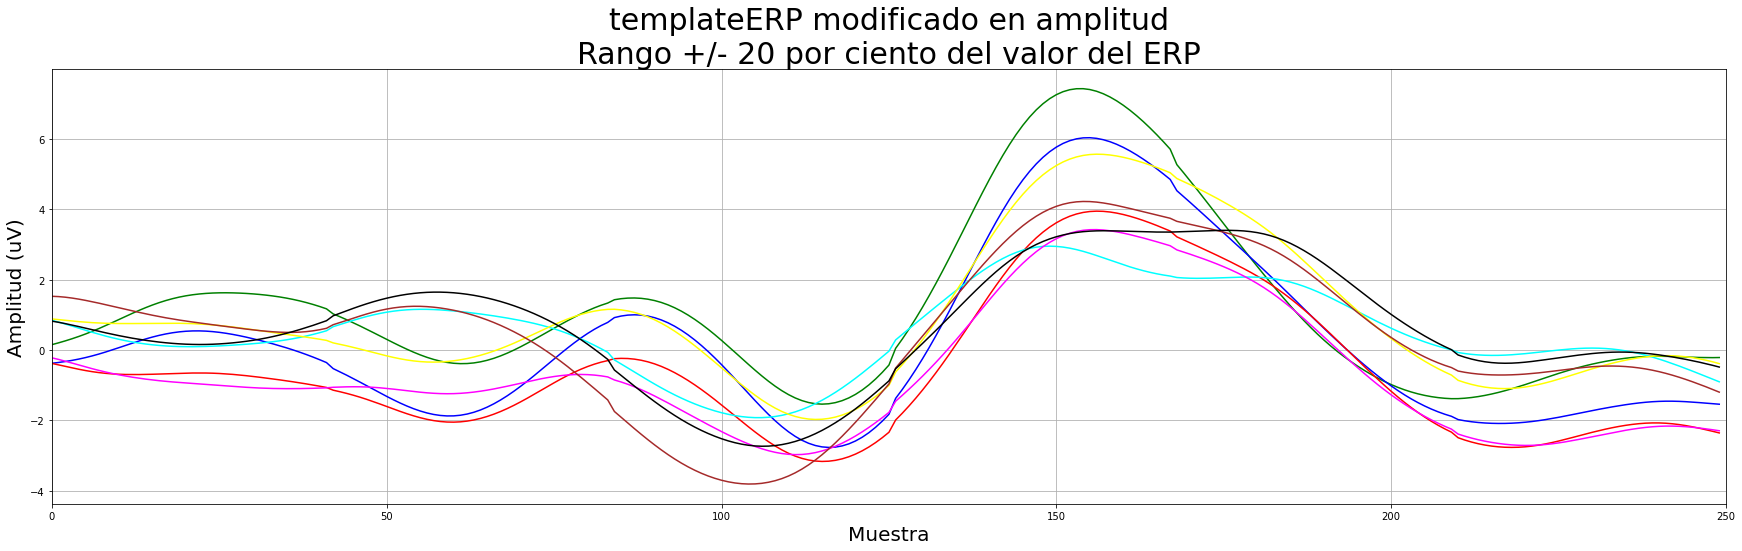

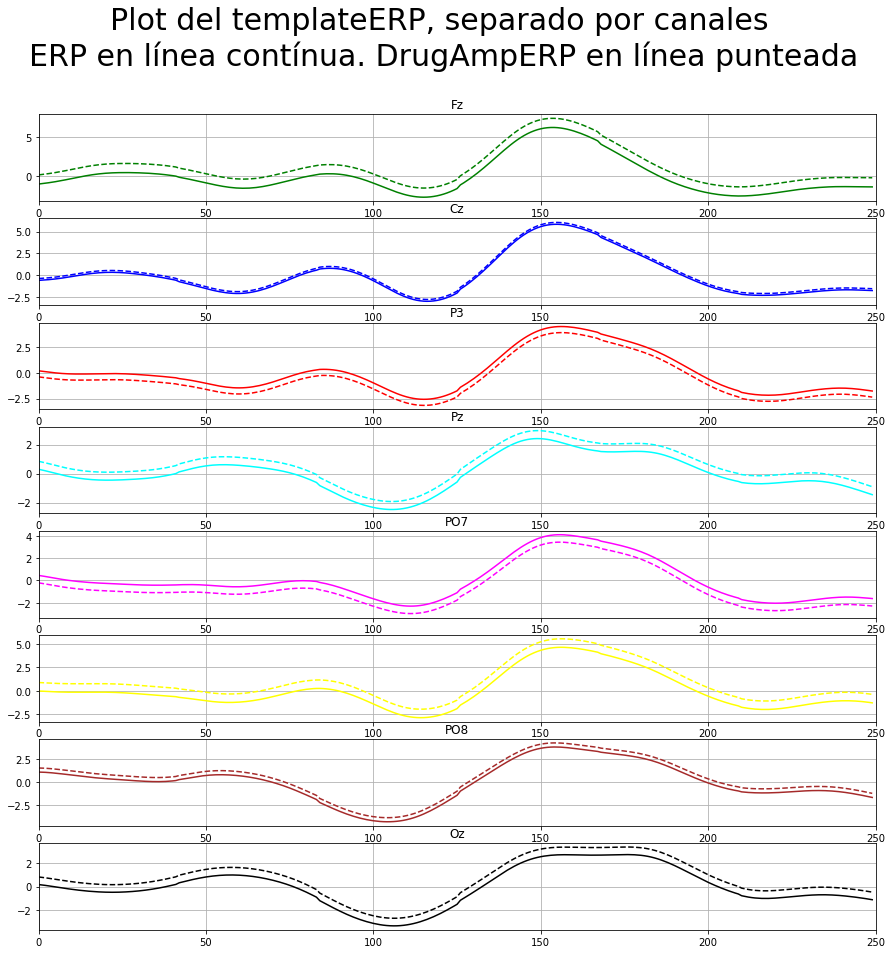

In [71]:
#-----------------------------------------------------------------------
# Plot del templateERP completo
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                          
axes = plt.gca()                                                    
for i in range(0,8):
    plt.plot(df_erptemplate1['sample'], df_erptemplate1[i], color[i])     
axes.set_title('templateERP original'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
# plt.savefig("./a_images/ERPTemplate.jpg")
#plt.axis((0,250,-6,8))  
plt.xlim([0,250]) #plt.ylim([0.9,2.1])                                            
plt.grid(), plt.show()
#-----------------------------------------------------------------------
# Plot del templateERP modificado
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                          
axes = plt.gca()                                                    
for i in range(0,8):
    plt.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate[i], color[i])     
axes.set_title('templateERP modificado en amplitud\nRango +/- 20 por ciento del valor del ERP'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
# plt.savefig("./a_images/ERPTemplate.jpg")
#plt.axis((0,250,-6,8))  
plt.xlim([0,250]) #plt.ylim([0.9,2.1])                                            
plt.grid(), plt.show()
#-----------------------------------------------------------------------
# Plot del templateERP, separado por canales
#-----------------------------------------------------------------------
# color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas
# ch_names=['Fz','Cz','P3','Pz','P4','PO7','PO8', 'Oz'] # Nombres de los canales
xlim_general=([0,250])
ylim_general=([-6,8])
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=8, ncols=1,figsize=(15,15))
fig.suptitle('Plot del templateERP, separado por canales \nERP en línea contínua. DrugAmpERP en línea punteada', fontsize=30)

ax0.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,0], label='0', color='green')
ax0.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,0], label='0',  color='green', linestyle='--')
ax0.set_xlim(xlim_general), '''ax0.set_ylim(ylim_general)''', ax0.set_title(ch_names[0]), ax0.grid()

ax1.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,1], label='1', color='blue') 
ax1.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,1], label='1', color='blue', linestyle='--')
ax1.set_xlim(xlim_general), '''ax1.set_ylim(ylim_general)''', ax1.set_title(ch_names[1]), ax1.grid()

ax2.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,2], label='2', color='red') 
ax2.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,2], label='2', color='red', linestyle='--')
ax2.set_xlim(xlim_general), '''ax2.set_ylim(ylim_general)''', ax2.set_title(ch_names[2]), ax2.grid()

ax3.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,3], label='3', color='cyan') 
ax3.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,3], label='3', color='cyan', linestyle='--')
ax3.set_xlim(xlim_general), '''ax3.set_ylim(ylim_general)''', ax3.set_title(ch_names[3]), ax3.grid()

ax4.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,4], label='4', color='magenta') 
ax4.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,4], label='4', color='magenta', linestyle='--')
ax4.set_xlim(xlim_general), '''ax4.set_ylim(ylim_general)''', ax4.set_title(ch_names[4]), ax4.grid()

ax5.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,5], label='5', color='yellow') 
ax5.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,5], label='5', color='yellow', linestyle='--')
ax5.set_xlim(xlim_general), '''ax5.set_ylim(ylim_general)''', ax4.set_title(ch_names[5]), ax5.grid()

ax6.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,6], label='6', color='brown') 
ax6.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,6], label='6', color='brown', linestyle='--')
ax6.set_xlim(xlim_general), '''ax6.set_ylim(ylim_general)''', ax6.set_title(ch_names[6]), ax6.grid()

ax7.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,7], label='7', color='k') 
ax7.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,7], label='7', color='k', linestyle='--')
ax7.set_xlim(xlim_general), '''ax7.set_ylim(ylim_general)''', ax7.set_title(ch_names[7]), ax7.grid()
plt.savefig("./a_images/ERPTemplate4.jpg")
plt.show()